Nenwin-project (NEural Networks WIthout Neurons) for
the AI Honors Academy track 2020-2021 at the TU Eindhoven.

Authors: Lulof Pirée

May 2021

Copyright (C) 2021 Lulof Pirée

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

# Training results
This notebook demonstrates the results of various training runs, for easy reference.

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

from nenwin.constants import BANKNOTE_CHECKPOINT_DIR, \
    BANKNOTE_FIGURE_DIR
from nenwin.backprop.training_stats import TrainingStats

In [2]:
checkpoints = os.listdir(BANKNOTE_CHECKPOINT_DIR)
checkpoints = tuple(filter(lambda s : s[-4:] == ".txt", checkpoints))
checkpoints

('BANKNOTE_A_Sat_May_15_16-20-25_2021.txt',
 'BANKNOTE_A_Thu_May_20_08-51-24_2021.txt',
 'BANKNOTE_A_Thu_May_20_08-51-24_2021_checkpoint.txt',
 'BANKNOTE_A_Wed_May_19_15-26-30_2021.txt',
 'BANKNOTE_A_Wed_May_19_15-26-30_2021_checkpoint.txt',
 'BANKNOTE_A_Wed_May_19_22-16-18_2021.txt',
 'BANKNOTE_A_Wed_May_19_22-16-18_2021_checkpoint.txt',
 'BANKNOTE_B_Sun_May_16_12-32-51_2021.txt',
 'BANKNOTE_C_Mon_May_17_08-40-35_2021.txt',
 'BANKNOTE_Thu_May_13_16-50-52_2021.txt')

In [3]:
def load_stats(checkpoint_filename: str) -> TrainingStats:
    stats_filename = checkpoint_filename.replace(".txt", "_stats.pickle")
    with open(stats_filename, "rb") as stats_file:
        stats = pickle.load(stats_file)
    return stats


for checkpoint in checkpoints:
    filename = os.path.join(BANKNOTE_CHECKPOINT_DIR, checkpoint)
    try:
        stats = load_stats(filename)
    except:
        continue

    print(f"Architecture {checkpoint[9]}")
    with open(filename, "r") as file:
        for line in tuple(file.readlines())[1:]:
            print(line, end="")

    print()
    print(f"Val accuracy: {stats.validation_accuracies[-1]:.5f}")
    print(f"Training loss: {stats.train_losses[-1]:.1f}")
    print("\n" + "--"*20 + "\n")

Architecture A
# Num finished epochs: 20
# Batch size: 1
# VelInputPlacer
Val accuracy: 0.17518
Training loss: 20307.7

----------------------------------------

Architecture A
# Num finished epochs: 20
# Batch size: 2
# VelInputPlacer
Val accuracy: 0.13869
Training loss: 21173.4

----------------------------------------

Architecture A
# Num finished epochs: 20
# Batch size: 1
# MassInputPlacer
Val accuracy: 0.00000
Training loss: 13.5

----------------------------------------

Architecture A
# Num finished epochs: 20
# Batch size: 5
# VelInputPlacer
Val accuracy: 0.06569
Training loss: 28580.8

----------------------------------------

Architecture B
# Num finished epochs: 20
# Batch size: 1
# VelInputPlacer
Val accuracy: 0.12409
Training loss: 24788.9

----------------------------------------

Architecture C
# Num finished epochs: 20
# Batch size: 1
# VelInputPlacer
Val accuracy: 0.08029
Training loss: 33143.6

----------------------------------------



### Arch A, VelInputPlacer, batch_size = 1

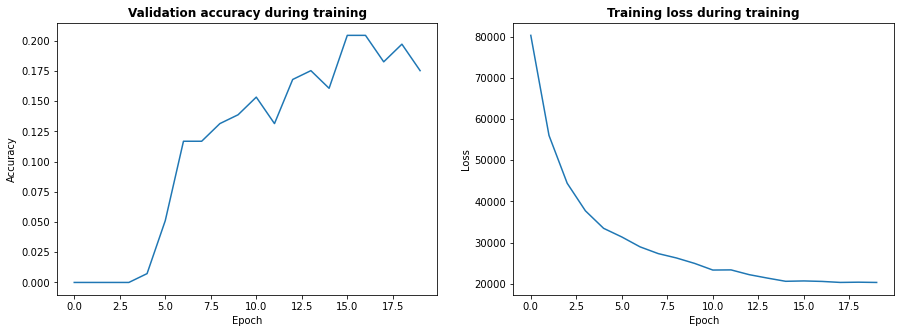

In [4]:
stats = load_stats(os.path.join(BANKNOTE_CHECKPOINT_DIR, 'BANKNOTE_A_Sat_May_15_16-20-25_2021.txt'))
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
ax = axes[0]
ax.plot(stats.validation_accuracies)
ax.set_title("Validation accuracy during training", weight="bold")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy");

ax = axes[1]
ax.plot(stats.train_losses)
ax.set_title("Training loss during training", weight="bold")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss");

fig.savefig(os.path.join(BANKNOTE_FIGURE_DIR, 'A_batch1_velinputplacer.pdf'))